In [2]:
import numpy as np
from Bio import SeqIO
from codon_optimization import *

## 1. Spike Protein

In [3]:
sars_cov_gene = SeqIO.read("./SARS_Cov2_glycoprotein_YP_009724390_datasets/gene.fna", "fasta").seq
weight_params = {'cub_h1': 1, 'cpub_h1': 1, 'cub_h2': 0, 'cpub_h2': 0, 'rep_nuc': 0.75, 'rho_T': 0.5, 'B_rho': 0.4} # Inaccurate
opt_codon_seq = 'ATGTTCGTCTTCCTCGTGCTGCTGCCTCTCGTCAGCAGTCAGTGTGTGAACCTCACTACTCGCACACAGCTGCCTCCAGCATACACTAATTCCTTCACTAGAGGAGTCTACTATCCAGATAAGGTCTTCAGATCATCTGTGCTGCACAGCACACAGGATCTCTTCCTTCCATTCTTCAGCAATGTCACTTGGTTCCATGCTATACATGTGTCTGGCACCAATGGCACCAAGAGATTCGACAATCCTGTGCTGCCATTCAATGATGGTGTCTACTTCGCCAGCACAGAGAAGAGCAACATCATCAGAGGCTGGATCTTCGGAACTACACTAGATAGTAAGACACAGTCACTGCTCATCGTGAACAATGCCACCAATGTAGTGATCAAGGTGTGTGAGTTCCAGTTCTGCAATGATCCATTCCTTGGTGTCTACTATCATAAGAATAACAAGAGCTGGATGGAGAGTGAGTTCAGAGTCTACAGCAGTGCTAACAACTGTACATTCGAGTATGTATCTCAGCCATTCCTGATGGATCTGGAAGGCAAGCAAGGCAACTTCAAGAACCTGAGAGAGTTCGTGTTCAAGAATATAGATGGTTACTTCAAGATCTACAGCAAGCATACACCAATTAATCTAGTGAGAGATCTGCCTCAAGGCTTCAGTGCTCTAGAGCCACTAGTAGATCTGCCTATTGGCATCAACATCACTCGATTCCAGACACTACTAGCTCTGCACAGATCATATCTCACTCCTGGAGACAGCAGCAGTGGCTGGACAGCTGGTGCTGCTGCATACTATGTAGGATATCTGCAGCCAAGGACCTTCCTGCTGAAGTATAATGAGAATGGAACTATCACAGATGCTGTAGACTGTGCTCTAGATCCTCTCAGTGAGACTAAGTGTACTCTGAAGTCCTTCACTGTAGAGAAGGGCATCTATCAGACATCTAACTTCAGAGTGCAGCCAACAGAGAGCATCGTGCGCTTCCCTAACATCACTAACCTCTGTCCATTCGGAGAAGTCTTCAATGCTACTCGCTTCGCATCTGTCTATGCATGGAACAGGAAGCGCATCAGCAACTGTGTAGCTGACTACAGTGTGCTGTACAACAGTGCTAGCTTCAGCACATTCAAGTGCTATGGTGTGTCTCCAACCAAGCTCAATGATCTGTGCTTCACCAATGTCTATGCTGACAGCTTCGTCATCAGAGGAGATGAGGTGAGACAGATAGCTCCTGGACAGACAGGCAAGATAGCTGACTATAATTACAAGCTTCCTGATGACTTCACTGGCTGCGTCATAGCATGGAACAGCAACAATCTAGATAGTAAGGTTGGTGGCAACTATAATTATCTCTACAGACTCTTCAGGAAGAGCAACCTGAAGCCATTCGAGAGAGACATCAGCACAGAGATCTATCAGGCTGGAAGCACACCATGTAATGGTGTGGAAGGCTTCAACTGCTACTTCCCTCTGCAGAGCTATGGCTTCCAGCCAACTAATGGAGTTGGATATCAGCCATATCGAGTAGTAGTGCTGAGCTTCGAGCTGCTGCACGCTCCTGCTACAGTATGTGGACCTAAGAAGAGCACTAATCTAGTGAAGAACAAGTGTGTGAACTTCAACTTCAATGGACTCACTGGAACTGGAGTGCTGACAGAGAGCAACAAGAAGTTCCTGCCATTCCAGCAGTTCGGAAGAGATATAGCAGATACTACAGATGCAGTGAGAGATCCACAGACACTAGAGATACTAGACATCACTCCTTGCAGCTTCGGAGGAGTGTCTGTGATCACTCCTGGAACTAATACATCTAATCAAGTAGCTGTGCTGTATCAGGATGTCAACTGCACAGAGGTGCCAGTAGCTATACATGCAGATCAGCTGACTCCAACATGGAGAGTCTACAGCACAGGCAGCAATGTCTTCCAGACTAGAGCTGGCTGTCTCATAGGAGCAGAGCATGTCAATAATTCATATGAGTGTGACATACCAATTGGTGCTGGCATCTGTGCTAGCTATCAGACACAGACTAATTCTCCAAGACGAGCTAGATCAGTAGCATCTCAGAGCATCATAGCATATACTATGTCTCTAGGAGCTGAGAATTCAGTAGCATACAGCAACAACAGCATAGCTATACCAACCAACTTCACTATATCTGTGACTACAGAGATACTGCCTGTCAGCATGACTAAGACATCAGTAGACTGTACTATGTACATCTGTGGAGATAGTACAGAGTGCAGCAACCTGCTGCTGCAGTATGGAAGCTTCTGCACACAGCTGAACAGAGCTCTGACTGGAATAGCAGTAGAGCAGGACAAGAATACACAGGAGGTGTTCGCTCAAGTGAAGCAGATCTACAAGACACCTCCAATTAAGGACTTCGGTGGCTTCAACTTCTCTCAGATACTGCCAGATCCTTCCAAGCCTTCCAAGCGCAGCTTCATCGAGGATCTGCTCTTCAACAAGGTCACTCTAGCAGATGCTGGCTTCATCAAGCAGTATGGAGACTGTCTAGGAGACATAGCAGCTAGAGATCTCATCTGTGCTCAGAAGTTCAATGGCCTGACTGTGCTGCCTCCTCTGCTGACAGATGAGATGATAGCACAGTACACATCAGCTCTGCTAGCAGGAACTATCACTAGTGGCTGGACCTTCGGTGCTGGAGCTGCTCTGCAGATACCATTCGCGATGCAGATGGCATATAGATTCAATGGAATTGGAGTGACTCAGAATGTGCTCTATGAGAATCAGAAGCTGATAGCTAACCAGTTCAATTCAGCAATTGGCAAGATACAGGACTCTCTGAGCAGCACAGCATCTGCACTAGGCAAGCTGCAGGATGTCGTCAACCAGAATGCACAAGCACTCAACACTCTAGTGAAGCAGCTGAGCAGCAACTTCGGTGCTATATCATCTGTGCTGAATGACATACTGAGCAGACTAGACAAGGTAGAGGCAGAGGTGCAGATCGACAGACTCATCACTGGAAGACTGCAGTCTCTGCAGACATATGTCACTCAGCAGCTCATCAGAGCTGCTGAGATCAGAGCATCTGCTAATCTAGCAGCTACTAAGATGTCTGAGTGTGTGCTAGGCCAGAGCAAGAGAGTAGACTTCTGTGGCAAGGGCTATCATCTGATGAGCTTCCCTCAGAGTGCTCCTCATGGCGTCGTCTTCCTGCATGTGACATATGTGCCTGCTCAGGAGAAGAACTTCACTACAGCACCTGCTATCTGTCATGATGGCAAGGCTCACTTCCCAAGAGAAGGAGTCTTCGTGTCTAATGGCACACACTGGTTCGTGACTCAGCGCAACTTCTATGAGCCTCAGATCATCACTACAGATAACACCTTCGTGTCTGGCAACTGTGATGTCGTCATCGGCATCGTGAATAATACTGTCTATGATCCACTGCAGCCTGAGCTAGATAGCTTCAAGGAGGAGCTAGATAAGTACTTCAAGAACCACACATCTCCAGATGTAGATCTAGGAGACATCAGTGGAATTAATGCATCTGTCGTCAATATACAGAAGGAGATAGACAGACTCAATGAAGTGGCCAAGAACTTGAATGAGTCTCTGATAGATCTGCAGGAACTTGGCAAGTATGAGCAGTACATCAAGTGGCCTTGGTACATCTGGCTTGGATTCATAGCTGGCCTCATCGCTATCGTGATGGTGACTATCATGCTGTGCTGCATGACATCATGCTGCAGCTGTCTGAAGGGCTGCTGCAGCTGCGGCAGCTGCTGTAAGTTCGACGAGGATGACAGTGAGCCTGTGCTGAAGGGTGTGAAGCTGCACTACACA'
len(opt_codon_seq)

3819

In [8]:
print(sars_cov_gene[:40])

ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTC


In [6]:
print(SeqIO.read("./SARS_Cov2_glycoprotein_YP_009724390_datasets/protein.faa", "fasta").seq)
len(SeqIO.read("./SARS_Cov2_glycoprotein_YP_009724390_datasets/protein.faa", "fasta").seq)

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGR

1273

DNA name: SPIKE_SARS2 Spike glycoprotein                         \
                                          cub_h1 cpub_h1 cub_h2 cpub_h2   
Weights                                      1.0     1.0    0.0     0.0   

                             
        rep_nuc rho_T B_rho  
Weights    0.75   0.5   0.4

,Optimal Codon Seq
Similarity to ref_codon,0.751767
Effective number of codons,36.934756
GC,47.342236
GC3,53.260016


,h_sapiens,sars_cov2
CAI,0.797619,0.509745
CPB,0.079326,-2.160268


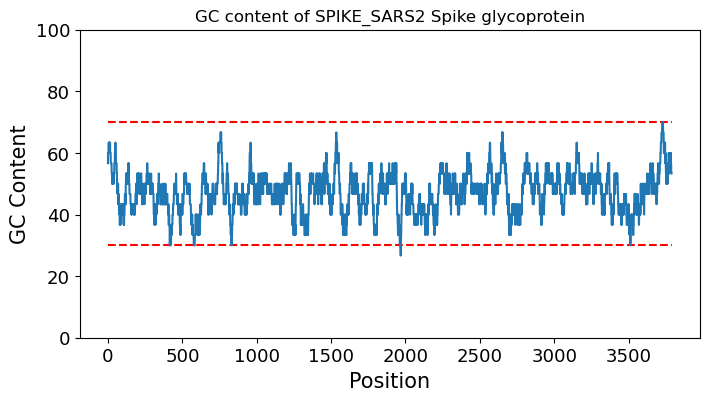

In [14]:
dp_metrics(name='SPIKE_SARS2 Spike glycoprotein', organisms=opt_codon_seq, hosts=['h_sapiens', 'sars_cov2'], weight_params=weight_params, ref_codon=sars_cov_gene[:-3])

실험적으로 알려진 수치와 일치하지 않는 Metric: 1. Effective number of codons, 2.GC3 <br>
이유: 이 두 개의 metric의 경우, 현재 우리가 만든 알고리즘 내에서 조절할 수 없다. 

## 2. Insulin

In [4]:
insulin_human_dna = 'ATGGCCCTGTGGATGCGCCTCCTGCCCCTGCTGGCGCTGCTGGCCCTCTGGGGACCTGACCCAGCCGCAGCCTTTGTGAACCAACACCTGTGCGGCTCACACCTGGTGGAAGCTCTCTACCTAGTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGACCTGCAGGTGGGGCAGGTGGAGCTGGGCGGGGGCCCTGGTGCAGGCAGCCTGCAGCCCTTGGCCCTGGAGGGGTCCCTGCAGAAGCGTGGCATTGTGGAACAATGCTGTACCAGCATCTGCTCCCTCTACCAGCTGGAGAACTACTGCAACTAG'
weight_params = {'cub_h1': 0.02, 'cpub_h1': 0.6, 'cub_h2': 0, 'cpub_h2': 0, 'rep_nuc': 1, 'rho_T': 0.46, 'B_rho': 0.048}
opt_codon_seq = 'ATGGCGCTATGGATGCGACTACTACCACTACTCGCACTACTCGCACTATGGGGACCAGATCCTGCTGCTGCATTCGTTAATCAGCATCTCTGTGGTTCTCATCTCGTCGAGGCGCTATATCTCGTCTGTGGTGAGAGAGGATTCTTCTACACACCTAAGACACGACGAGAGGCAGAGGATCTACAGGTTGGTCAGGTAGAGCTCGGTGGTGGACCAGGAGCAGGATCGCTACAGCCACTAGCGCTGGAAGGTTCACTACAGAAGAGAGGAATAGTAGAGCAGTGCTGTACATCGATATGCTCACTATATCAGCTCGAGAATTACTGTAAT'

DNA name: Insulin                                            
                   cub_h1 cpub_h1 cub_h2 cpub_h2 rep_nuc rho_T  B_rho
Weights              0.02     0.6    0.0     0.0     1.0  0.46  0.048

,Optimal Codon Seq
Similarity to ref_codon,0.730303
Effective number of codons,32.514179
GC,50.606061
GC3,38.181818


,e_coli,h_sapiens
CAI,0.399218,0.578754
CPB,0.158323,-0.071552


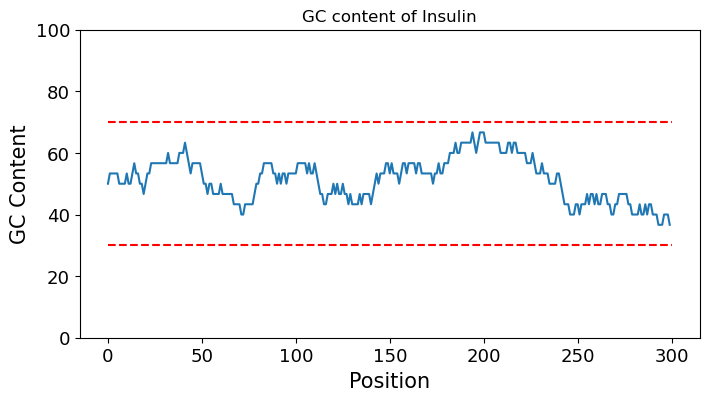

In [ ]:
dp_metrics(name='Insulin', codon_seq=opt_codon_seq, organisms=['e_coli','h_sapiens'], weight_params=weight_params, ref_codon=insulin_human_dna[:-3])

## 3. Recombinant Insulin